In [2]:
import rebrickable_api
from typing import List
import time
from sklearn.cluster import KMeans
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
release_years: List[int] = []
num_parts: List[int] = []
perc_unique: List[float] = []
mocs: List[bool] = []
names: List[str] = []

themes: List[int] = rebrickable_api.show_themes("star wars")

In [4]:
for theme in themes:
    sets = rebrickable_api.show_sets(theme)
    for set in tqdm(range(len(sets))):
        if sets[set]['num_parts']>0:
            release_years.append(sets[set]['year'])
            num_parts.append(sets[set]['num_parts'])
            names.append(sets[set]['name'])
            time.sleep(1)
            unique_parts = rebrickable_api.unique_parts(sets[set]['set_num'])
            perc_unique.append(unique_parts/sets[set]['num_parts'])
            time.sleep(1)
            moc_flag = rebrickable_api.moc_count(sets[set]['set_num'])>0
            mocs.append(moc_flag)

100%|██████████| 13/13 [01:01<00:00,  4.75s/it]


2 clusters
0: R2-D2 / C-3PO Droid Collectors Set parts: 1, percent: 1.0
0: Pit Droid parts: 223, percent: 0.28699551569506726
0: Battle Droid parts: 336, percent: 0.25595238095238093
0: Destroyer Droid parts: 567, percent: 0.1781305114638448
0: C-3PO parts: 339, percent: 0.19469026548672566
0: Stormtrooper parts: 361, percent: 0.22714681440443213
0: R2-D2 parts: 239, percent: 0.28870292887029286
0: Darth Vader parts: 388, percent: 0.20618556701030927
0: Jango Fett parts: 425, percent: 0.21411764705882352
0: Super Battle Droid parts: 378, percent: 0.21164021164021163
0: Clone Turbo Tank parts: 64, percent: 0.578125
0: Republic Attack Cruiser parts: 84, percent: 0.4523809523809524
0: AT-TE Walker parts: 94, percent: 0.4574468085106383
0: Republic Gunship parts: 94, percent: 0.4787234042553192
0: Imperial Shuttle parts: 70, percent: 0.5285714285714286
0: AT-AT Walker parts: 83, percent: 0.4578313253012048
0: Slave I parts: 76, percent: 0.5657894736842105
0: Bounty Hunter Assault Gunship p

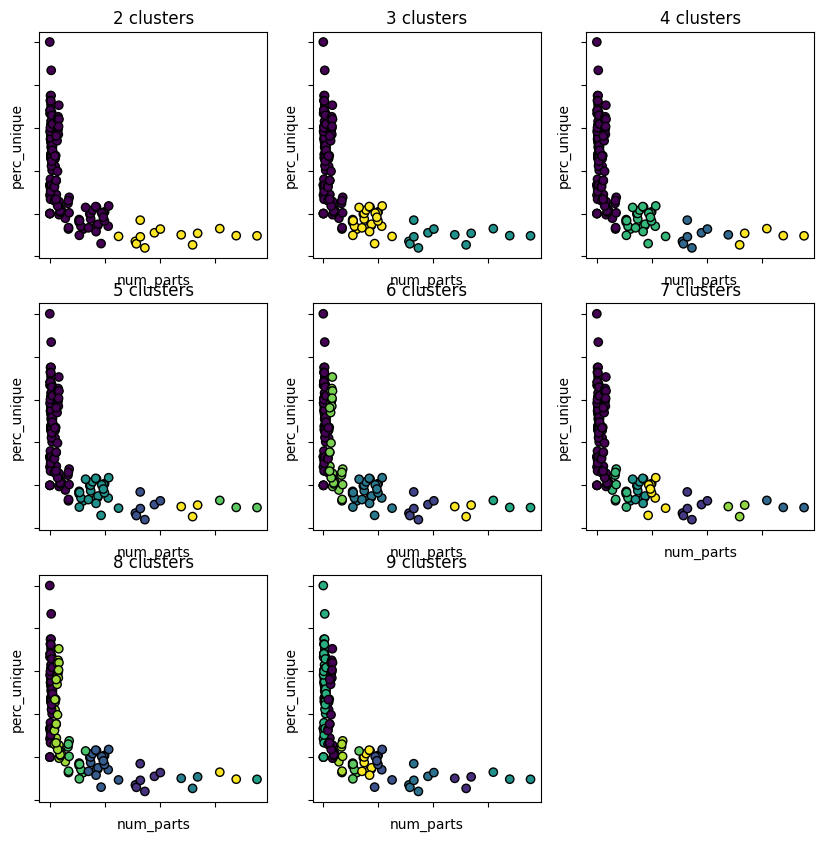

In [5]:
data = np.column_stack((num_parts,perc_unique))
fig = plt.figure(figsize=(10,10))

for n in range(2,10):
    title=f"{n} clusters"
    kmeans = KMeans(n_clusters=n).fit(data)
    ax = fig.add_subplot(3,3,n-1)
    labels = kmeans.labels_
    ax.scatter(num_parts, perc_unique, c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_xlabel("num_parts")
    ax.set_ylabel("perc_unique")
    ax.set_title(title)
    print(f"{n} clusters")
    for label, name, parts, unique in zip(labels, names,num_parts, perc_unique):
        print(f"{label}: {name} parts: {parts}, percent: {unique}")

plt.show()

In [2]:
import rebrickable_api
from typing import List
import time
from sklearn.cluster import KMeans
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

0: R2-D2 / C-3PO Droid Collectors Set parts: 1, mocs: False
0: Pit Droid parts: 223, mocs: False
0: Battle Droid parts: 336, mocs: False
0: Destroyer Droid parts: 567, mocs: False
0: C-3PO parts: 339, mocs: False
0: Stormtrooper parts: 361, mocs: False
0: R2-D2 parts: 239, mocs: False
0: Darth Vader parts: 388, mocs: False
0: Jango Fett parts: 425, mocs: False
0: Super Battle Droid parts: 378, mocs: False
0: Clone Turbo Tank parts: 64, mocs: False
0: Republic Attack Cruiser parts: 84, mocs: False
0: AT-TE Walker parts: 94, mocs: False
0: Republic Gunship parts: 94, mocs: True
0: Imperial Shuttle parts: 70, mocs: False
0: AT-AT Walker parts: 83, mocs: False
0: Slave I parts: 76, mocs: False
0: Bounty Hunter Assault Gunship parts: 81, mocs: False
0: Stormtrooper parts: 5, mocs: False
0: White Boba Fett Figure parts: 5, mocs: False
0: Shadow ARF Trooper parts: 5, mocs: False
0: Battle Droid on STAP parts: 28, mocs: False
0: Imperial Speeder Bike parts: 33, mocs: False
0: Clone Walker part

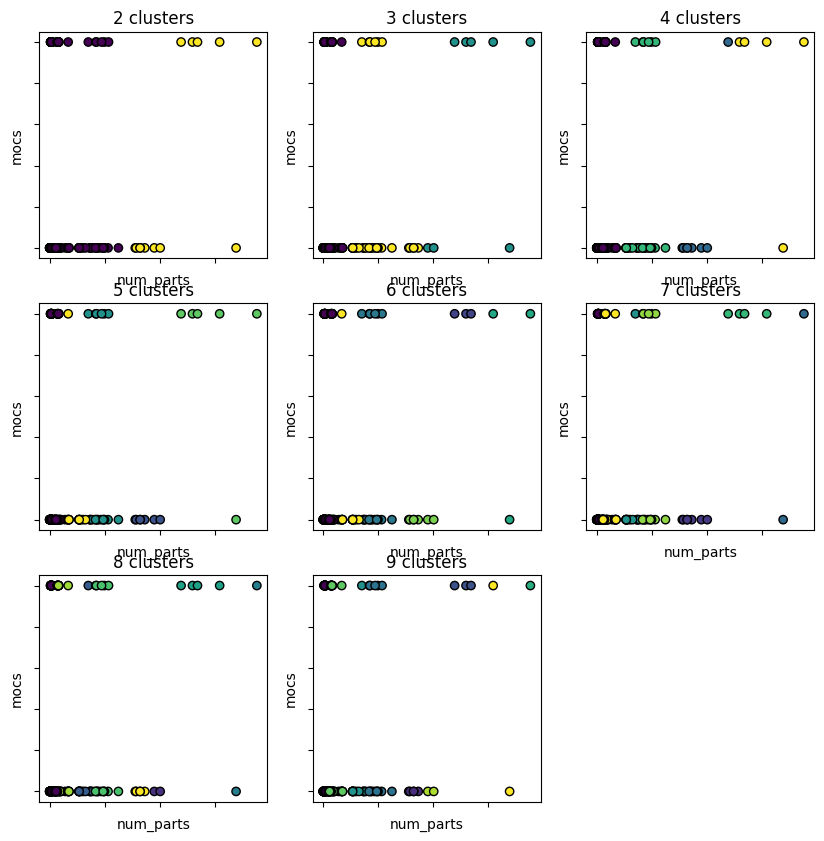

In [7]:
data = np.column_stack((num_parts,mocs))
fig = plt.figure(figsize=(10,10))

for n in range(2,10):
    title=f"{n} clusters"
    kmeans = KMeans(n_clusters=n).fit(data)
    ax = fig.add_subplot(3,3,n-1)
    labels = kmeans.labels_
    ax.scatter(num_parts, mocs, c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_xlabel("num_parts")
    ax.set_ylabel("mocs")
    ax.set_title(title)
    for label, name, parts, moc in zip(labels, names,num_parts, mocs):
        print(f"{label}: {name} parts: {parts}, mocs: {moc}")

plt.show()

0: R2-D2 / C-3PO Droid Collectors Set mocs: False, percent: 1.0
0: Pit Droid mocs: False, percent: 0.28699551569506726
0: Battle Droid mocs: False, percent: 0.25595238095238093
0: Destroyer Droid mocs: False, percent: 0.1781305114638448
0: C-3PO mocs: False, percent: 0.19469026548672566
0: Stormtrooper mocs: False, percent: 0.22714681440443213
0: R2-D2 mocs: False, percent: 0.28870292887029286
0: Darth Vader mocs: False, percent: 0.20618556701030927
0: Jango Fett mocs: False, percent: 0.21411764705882352
0: Super Battle Droid mocs: False, percent: 0.21164021164021163
0: Clone Turbo Tank mocs: False, percent: 0.578125
0: Republic Attack Cruiser mocs: False, percent: 0.4523809523809524
0: AT-TE Walker mocs: False, percent: 0.4574468085106383
1: Republic Gunship mocs: True, percent: 0.4787234042553192
0: Imperial Shuttle mocs: False, percent: 0.5285714285714286
0: AT-AT Walker mocs: False, percent: 0.4578313253012048
0: Slave I mocs: False, percent: 0.5657894736842105
0: Bounty Hunter Ass

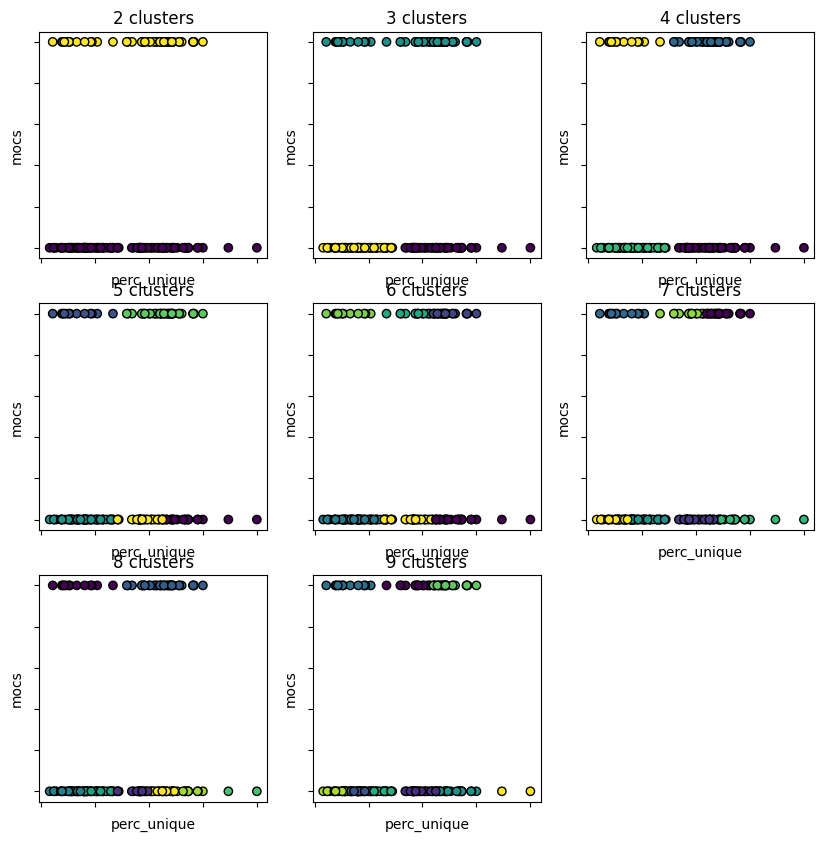

In [9]:
data = np.column_stack((perc_unique, mocs))

fig = plt.figure(figsize=(10,10))

for n in range(2,10):
    title=f"{n} clusters"
    kmeans = KMeans(n_clusters=n).fit(data)
    ax = fig.add_subplot(3,3,n-1)
    labels = kmeans.labels_
    ax.scatter(perc_unique, mocs, c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_ylabel("mocs")
    ax.set_xlabel("perc_unique")
    ax.set_title(title)
    for label, name, moc, unique in zip(labels, names,mocs, perc_unique):
        print(f"{label}: {name} mocs: {moc}, percent: {unique}")

plt.show()

0: R2-D2 / C-3PO Droid Collectors Set parts: 1, year: 2002
0: Pit Droid parts: 223, year: 2000
0: Battle Droid parts: 336, year: 2000
0: Destroyer Droid parts: 567, year: 2000
0: C-3PO parts: 339, year: 2001
0: Stormtrooper parts: 361, year: 2001
0: R2-D2 parts: 239, year: 2002
0: Darth Vader parts: 388, year: 2002
0: Jango Fett parts: 425, year: 2002
0: Super Battle Droid parts: 378, year: 2002
0: Clone Turbo Tank parts: 64, year: 2008
0: Republic Attack Cruiser parts: 84, year: 2009
0: AT-TE Walker parts: 94, year: 2009
0: Republic Gunship parts: 94, year: 2009
0: Imperial Shuttle parts: 70, year: 2010
0: AT-AT Walker parts: 83, year: 2010
0: Slave I parts: 76, year: 2011
0: Bounty Hunter Assault Gunship parts: 81, year: 2011
0: Stormtrooper parts: 5, year: 2009
0: White Boba Fett Figure parts: 5, year: 2010
0: Shadow ARF Trooper parts: 5, year: 2011
0: Battle Droid on STAP parts: 28, year: 2009
0: Imperial Speeder Bike parts: 33, year: 2009
0: Clone Walker parts: 31, year: 2009
0: R

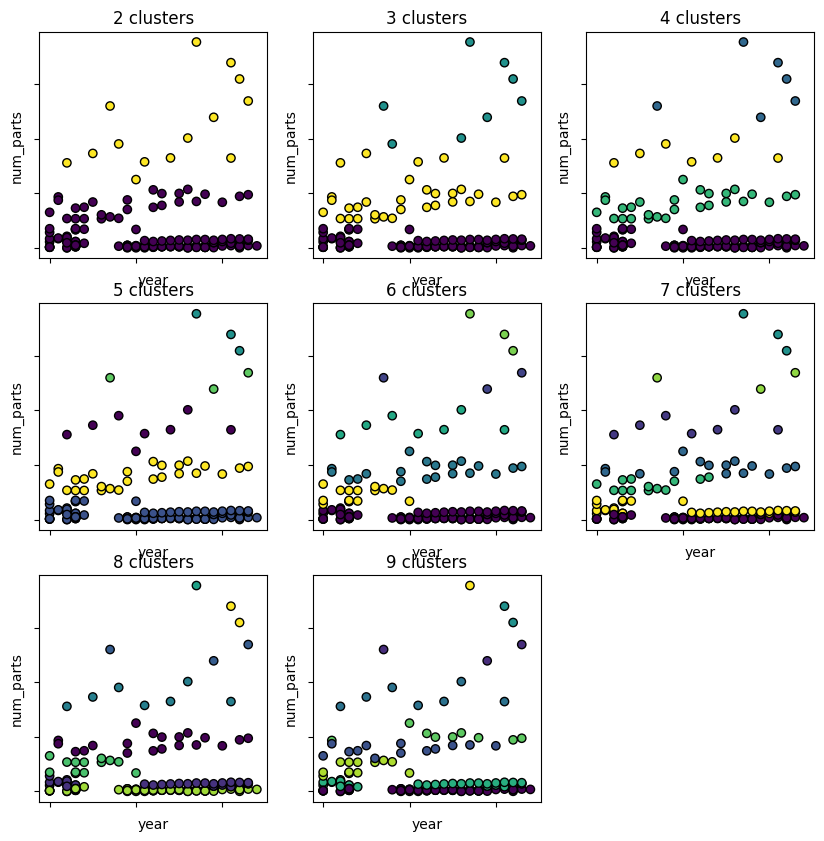

In [10]:
data = np.column_stack((num_parts,release_years))

fig = plt.figure(figsize=(10,10))

for n in range(2,10):
    title=f"{n} clusters"
    kmeans = KMeans(n_clusters=n).fit(data)
    ax = fig.add_subplot(3,3,n-1)
    labels = kmeans.labels_
    ax.scatter(release_years, num_parts, c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_ylabel("num_parts")
    ax.set_xlabel("year")
    ax.set_title(title)
    for label, name, parts, year in zip(labels, names,num_parts, release_years):
        print(f"{label}: {name} parts: {parts}, year: {year}")


plt.show()

0: R2-D2 / C-3PO Droid Collectors Set parts: 1, percent: 1.0, mocs:False
0: Pit Droid parts: 223, percent: 0.28699551569506726, mocs:False
0: Battle Droid parts: 336, percent: 0.25595238095238093, mocs:False
0: Destroyer Droid parts: 567, percent: 0.1781305114638448, mocs:False
0: C-3PO parts: 339, percent: 0.19469026548672566, mocs:False
0: Stormtrooper parts: 361, percent: 0.22714681440443213, mocs:False
0: R2-D2 parts: 239, percent: 0.28870292887029286, mocs:False
0: Darth Vader parts: 388, percent: 0.20618556701030927, mocs:False
0: Jango Fett parts: 425, percent: 0.21411764705882352, mocs:False
0: Super Battle Droid parts: 378, percent: 0.21164021164021163, mocs:False
0: Clone Turbo Tank parts: 64, percent: 0.578125, mocs:False
0: Republic Attack Cruiser parts: 84, percent: 0.4523809523809524, mocs:False
0: AT-TE Walker parts: 94, percent: 0.4574468085106383, mocs:False
0: Republic Gunship parts: 94, percent: 0.4787234042553192, mocs:True
0: Imperial Shuttle parts: 70, percent: 0.

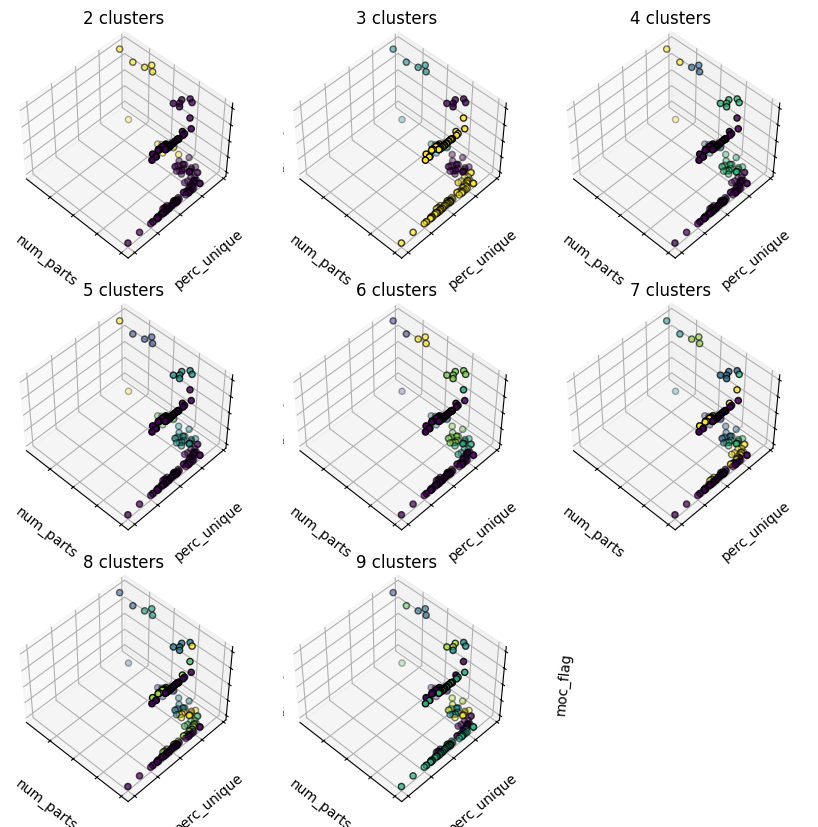

In [11]:
data = np.column_stack((num_parts,perc_unique,mocs))

fig = plt.figure(figsize=(10,10))

for n in range(2,10):
    title=f"{n} clusters"
    kmeans = KMeans(n_clusters=n).fit(data)
    ax = fig.add_subplot(3,3,n-1, projection="3d", elev=48, azim=134)
    labels = kmeans.labels_
    ax.scatter(num_parts, perc_unique, mocs, c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("num_parts")
    ax.set_ylabel("perc_unique")
    ax.set_zlabel("moc_flag")
    ax.set_title(title)
    for label, name, parts, unique, moc in zip(labels, names,num_parts, perc_unique, mocs):
        print(f"{label}: {name} parts: {parts}, percent: {unique}, mocs:{moc}")

plt.show()

0: R2-D2 / C-3PO Droid Collectors Set parts: 1, percent: 1.0, year: 2002
0: Pit Droid parts: 223, percent: 0.28699551569506726, year: 2000
0: Battle Droid parts: 336, percent: 0.25595238095238093, year: 2000
0: Destroyer Droid parts: 567, percent: 0.1781305114638448, year: 2000
0: C-3PO parts: 339, percent: 0.19469026548672566, year: 2001
0: Stormtrooper parts: 361, percent: 0.22714681440443213, year: 2001
0: R2-D2 parts: 239, percent: 0.28870292887029286, year: 2002
0: Darth Vader parts: 388, percent: 0.20618556701030927, year: 2002
0: Jango Fett parts: 425, percent: 0.21411764705882352, year: 2002
0: Super Battle Droid parts: 378, percent: 0.21164021164021163, year: 2002
0: Clone Turbo Tank parts: 64, percent: 0.578125, year: 2008
0: Republic Attack Cruiser parts: 84, percent: 0.4523809523809524, year: 2009
0: AT-TE Walker parts: 94, percent: 0.4574468085106383, year: 2009
0: Republic Gunship parts: 94, percent: 0.4787234042553192, year: 2009
0: Imperial Shuttle parts: 70, percent: 0

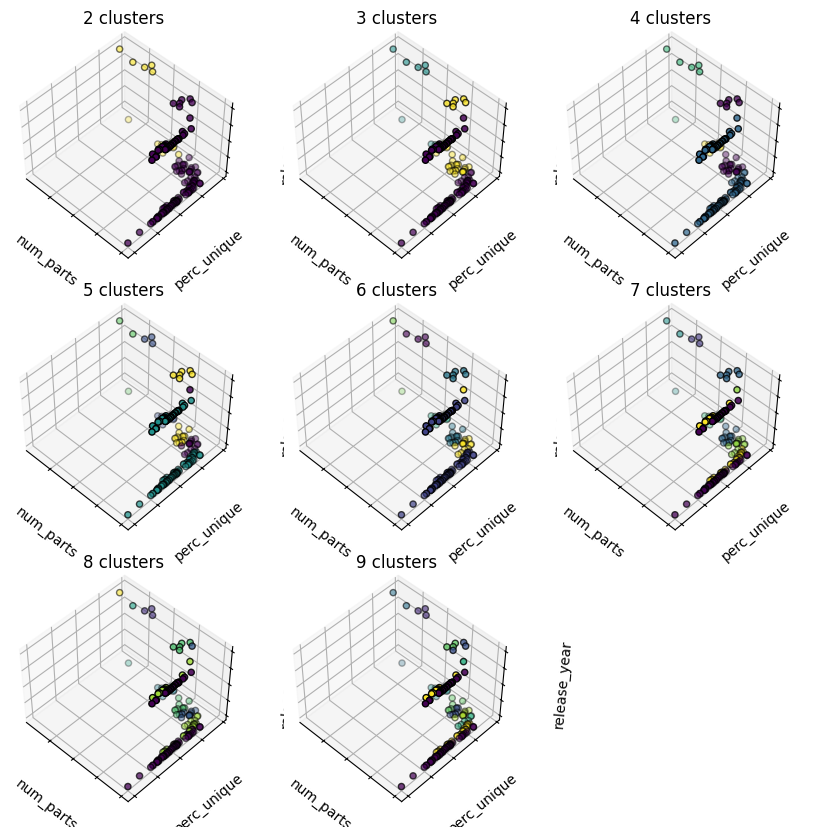

In [12]:
data = np.column_stack((num_parts,perc_unique,release_years))

fig = plt.figure(figsize=(10,10))

for n in range(2,10):
    title=f"{n} clusters"
    kmeans = KMeans(n_clusters=n).fit(data)
    ax = fig.add_subplot(3,3,n-1, projection="3d", elev=48, azim=134)
    labels = kmeans.labels_
    ax.scatter(num_parts, perc_unique, mocs, c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("num_parts")
    ax.set_ylabel("perc_unique")
    ax.set_zlabel("release_year")
    ax.set_title(title)
    for label, name, parts, unique, year in zip(labels, names,num_parts, perc_unique, release_years):
        print(f"{label}: {name} parts: {parts}, percent: {unique}, year: {year}")

plt.show()